In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("/content/helpdesk_customer_multi_lang_tickets.csv")
df.head(20)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...","Sehr geehrter <name>,\n\nvielen Dank für Ihre ...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out and...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,NaN,NaN,NaN,NaN
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\nWe are ...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,NaN,NaN,NaN
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\nI a...","Hello <name>,\n\nWe appreciate you informing u...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN
8,1030547538129,Urgent Assistance Needed,"Hello Support Team,\n\nI am reaching out to ur...","Dear <name>,\n\nWe appreciate you reaching out...",Request,IT Support,high,en,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Customer Service,Technical Guidance,NaN,NaN,NaN
9,1033012757171,Anmeldeprobleme mit Microsoft Surface Pro 7,"Sehr geehrter Tech Online Store Support,\n\nIc...","Sehr geehrter <name>,\n\nVielen Dank, dass Sie...",Problem,Technical Support,high,de,Tech Online Store,Login Issue,Technical Support,Product Support,Warranty Claim,Technical Guidance,Problem Resolution,NaN,NaN,NaN


In [21]:
df.shape

(1566, 18)

In [22]:
df.isnull().sum()

,0
id,0
subject,1
body,1
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0


In [23]:
df = df.iloc[:, :-5]

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

,0
id,0
subject,0
body,0
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0


In [26]:
df["language"].unique()

array(['en', 'de', 'pt', 'es', 'fr'], dtype=object)

In [27]:
# Group by 'queue' and 'priority', then count occurrences
priority_counts = df.groupby(['queue', 'priority'])['priority'].count().unstack(fill_value=0)

# Print the priority value counts for each queue
priority_counts

priority,high,low,medium
queue,,,
Billing and Payments,23,26,68
Customer Service,84,47,103
General Inquiry,0,5,8
Human Resources,0,0,9
IT Support,115,9,54
Product Support,118,45,124
Returns and Exchanges,5,22,17
Sales and Pre-Sales,0,16,33
Service Outages and Maintenance,39,5,0


In [28]:
df.nunique()

,0
id,1564
subject,1564
body,1564
answer,1564
type,4
queue,10
priority,3
language,5
business_type,5
tag_1,25


In [29]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def clean(review):

    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])

    return review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df['body'] = df['body'].apply(clean)
df.head(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4
0,1001352387736,Urgent: Critical impact on enterprise network ...,dear customer support team experiencing comple...,Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,dear customer supportbrbri hope message finds ...,"Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,hallo wir haben severe datenverluste mysql 803...,"Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,sehr geehrtes kundenserviceteamich hoffe diese...,"Sehr geehrter <name>,\n\nvielen Dank für Ihre ...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance
4,1024440081041,Solicitação de Assistência com Erro de Instala...,caro suporte ao clienteestou enfrentando um er...,"Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,dear tech online store customer supporti hope ...,"Dear <name>,\n\nThank you for reaching out and...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support
6,1026487543175,Request for Server Administration Assistance,dear services customer support writing request...,Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution
7,1027850274374,Immediate Attention Required: AWS Outage Concern,greetings services customer supporti name cont...,"Hello <name>,\n\nWe appreciate you informing u...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance
8,1030547538129,Urgent Assistance Needed,hello support teami reaching urgently request ...,"Dear <name>,\n\nWe appreciate you reaching out...",Request,IT Support,high,en,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution
9,1033012757171,Anmeldeprobleme mit Microsoft Surface Pro 7,sehr geehrter tech online store supportich hof...,"Sehr geehrter <name>,\n\nVielen Dank, dass Sie...",Problem,Technical Support,high,de,Tech Online Store,Login Issue,Technical Support,Product Support,Warranty Claim


In [31]:
df['body'][0]

'dear customer support team experiencing complete outage affecting enterprise network involving cisco router isr4331 disruption critically impacting secure wan connectivity across domains urgently requiring immediate intervention due issue company halted various essential operations significantly affecting services commitments clients technical team able resolve problem internally need expert support diagnose rectify issue swiftly please consider high priority provide us necessary technical assistance restore networks functionality thank prompt attention best regards name manager company'

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

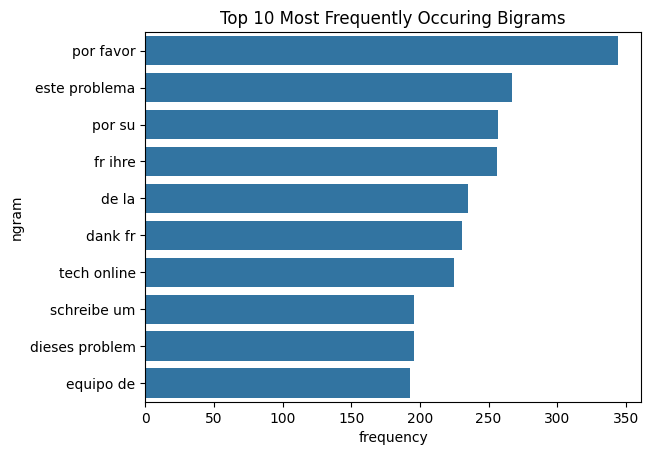

In [40]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['body'])
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

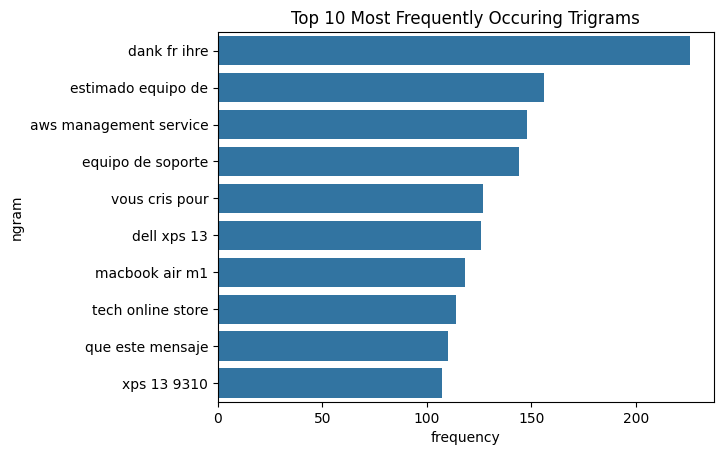

In [42]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['body'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()